<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/phaseenvelopesofCO2richmixtures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim

In [ ]:
import neqsim
from neqsim.neqsimpython import jNeqSim
from neqsim.thermo.thermoTools import *
import numpy as np
import math

 # Phase behaviour of CO2 rich mixtures

 The presence of traces of methane and H2S can significantly impact the phase behavior of CO2, and this should be taken into account when designing or operating a natural gas processing plant, CO2 transport, or storage system. The specific effects of these gases on CO2 may depend on the concentration and other physical and chemical factors of the system, and their variables must be considered when conducting any phase behavior prediction and experimental testing.

#Phase behaviour of pure CO2


triple point temperature  216.58 [K] and pressure  5.185 [bara]
critical temperature  304.19 [K] and pressure  73.815 [bara]


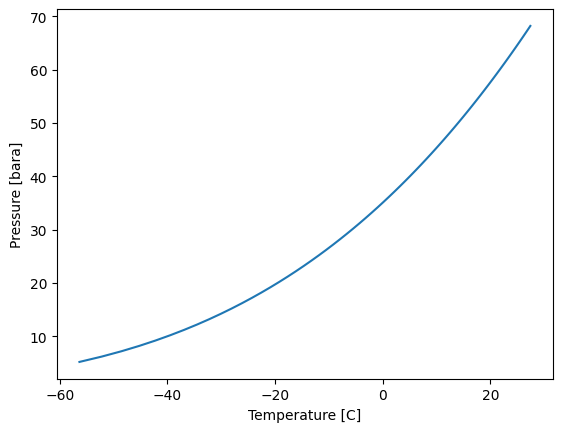

In [ ]:
fluid1 = fluid('umr') #create a fluid using the SRK-EoS
fluid1.addComponent('CO2', 1.0) #adding 1 mole methane to the fluid

TTrip = fluid1.getPhase(0).getComponent('CO2').getTriplePointTemperature()
PTrip = fluid1.getPhase(0).getComponent('CO2').getTriplePointPressure()
Tcritical = fluid1.getPhase(0).getComponent('CO2').getTC()
Pcritical = fluid1.getPhase(0).getComponent('CO2').getPC()

fluid1.setTemperature(TTrip)
fluid1.setPressure(PTrip)
print('triple point temperature ', TTrip, "[K] and pressure ", PTrip, "[bara]")
print('critical temperature ', Tcritical, "[K] and pressure ", Pcritical, "[bara]")

def bubleP(pressure):
    fluid1.setPressure(pressure)
    bubt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(PTrip, Pcritical-5.0, 1.0)
temperature = [bubleP(P) for P in pressure]

plt.plot(temperature, pressure);
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');

#Phase envelopes of CO2 rich mixtures
In the following examples we will use the UMR-PRU EoS for calculation of phase behaviour of CO2 rich mixtures.


#Phase envelope of a mixture of CO2 and methane
We will use the UMR-PRU EoS for calculation of phase behaviour of CO2 (95%) and methane (5%) mixture

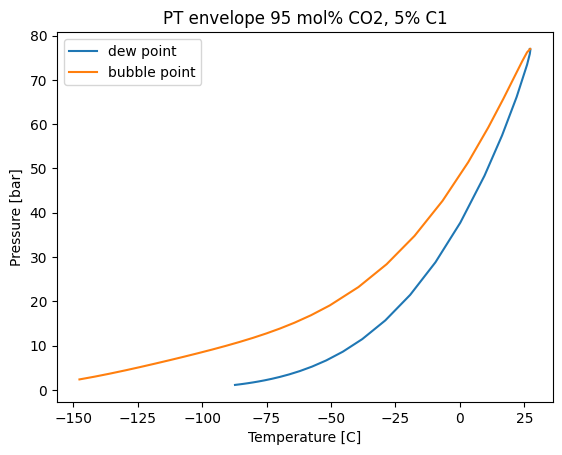

In [ ]:
fluid1 = fluid('umr')
fluid1.addComponent('methane',5.0)
fluid1.addComponent('CO2',95.0)

fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope 95 mol% CO2, 5% C1')
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()


#Phase envelopes of a mixture of CO2(90%), H2S(5%) and methane(5%)

We will use the UMR-PRU EoS for calculation of phase behaviour of CO2 (95%) and methane (5%) mixture

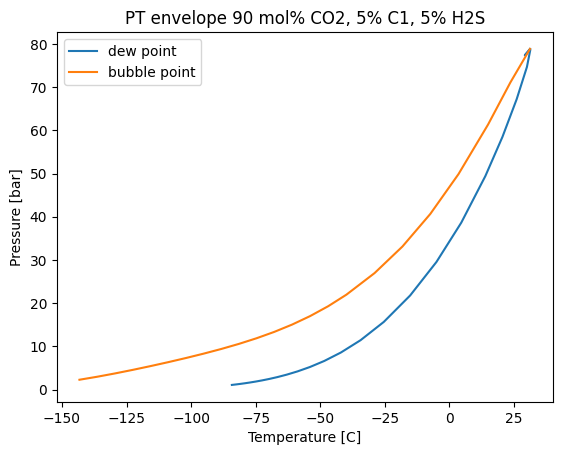

In [ ]:
fluid1 = fluid('umr')
fluid1.addComponent('H2S',5.0)
fluid1.addComponent('methane',5.0)
fluid1.addComponent('CO2',90.0)
fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()

plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point")
plt.plot([x-273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point")
plt.title('PT envelope 90 mol% CO2, 5% C1, 5% H2S')
plt.xlabel('Temperature [C]')
plt.ylabel('Pressure [bar]')
plt.legend()
plt.show()

#Advanced phase envelopes
In the following example we will add lines of constant properties in the phase envelope. Lines of constant density (yellow), mass fraction (black), enthalpy (red) and entropy (blue) is indicated.

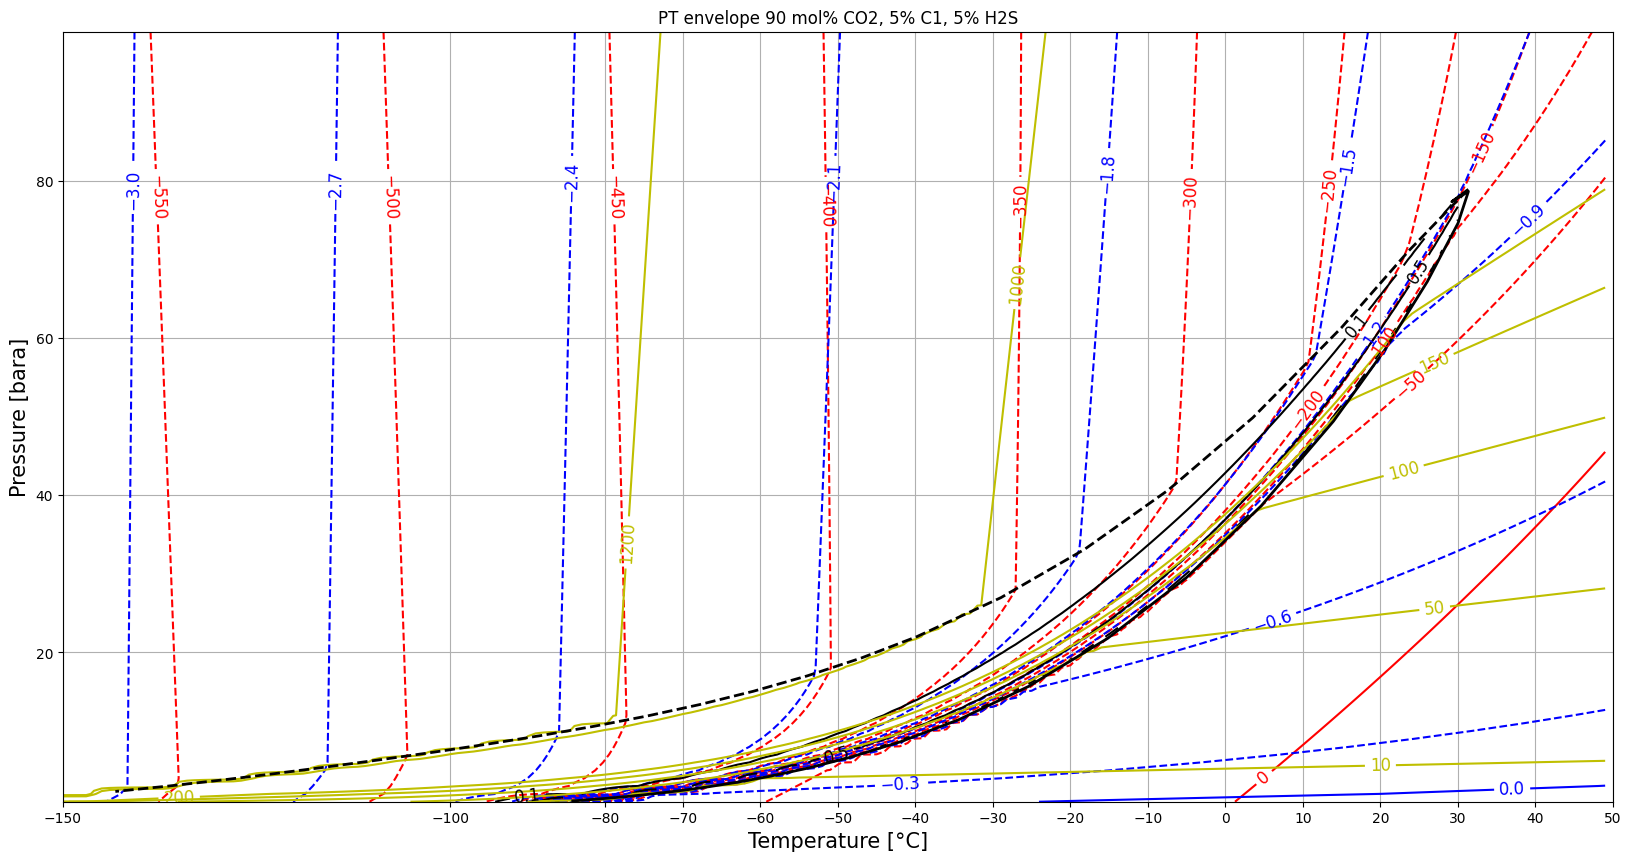

In [ ]:
minPressure = 1.0
maxPressure = 100.0

minTemperature = -150.0
maxTemperature = 50.0

fluid1 = fluid('umr')
fluid1.addComponent('H2S',5.0)
fluid1.addComponent('methane',5.0)
fluid1.addComponent('CO2',90.0)
fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")

def density(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    try:
      TPflash(fluid1)
      fluid1.initProperties();
    except:
      print('except')
      return math.nan
    fluid1.initProperties();
    return fluid1.getDensity('kg/m3')

def enthalpy(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    try:
      TPflash(fluid1)
      fluid1.initProperties();
    except:
      print('except')
      return math.nan
    return fluid1.getEnthalpy('J/kg')/1000.0

def entropy(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    try:
      TPflash(fluid1)
      fluid1.initProperties();
    except:
      print('except')
      return math.nan
    fluid1.initProperties();
    return fluid1.getEntropy('J/kgK')/1000.0

def fraction(temperature1,pressure1):
    fluid1.setPressure(pressure1, 'bara')
    fluid1.setTemperature(temperature1, 'C')
    try:
      TPflash(fluid1)
      fluid1.initProperties();
    except:
      print('except')
      return math.nan
    result = np.nan
    if(fluid1.getNumberOfPhases()>1):
      result = fluid1.getPhaseFraction('gas','mass')
    return result

temperature = np.arange(minTemperature, maxTemperature, int((maxTemperature-minTemperature)/1000)+1)
pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/1000)+1)

X, Y = np.meshgrid(temperature, pressure)
densityyGas = np.fromiter(map(density, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)
enthalpyGas = np.fromiter(map(enthalpy, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)
entropyGas = np.fromiter(map(entropy, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)
gasQuality = np.fromiter(map(fraction, X.ravel(), Y.ravel()), X.dtype).reshape(X.shape)

thermoOps = jNeqSim.thermodynamicOperations.ThermodynamicOperations(fluid1)
thermoOps.calcPTphaseEnvelope()
plt.rcParams['figure.figsize'] = [20, 10]
fig, ax = plt.subplots()
CS = ax.contour(temperature,pressure, enthalpyGas, 12 ,colors='r')
CS.collections[0].set_label('enthalpy [kJ/kg]')
CS2 = ax.contour(temperature,pressure, entropyGas, 12 ,colors='b')
CS2.collections[0].set_label('entropy [kJ/kgK]')
CS3 = ax.contour(temperature,pressure, gasQuality, 12 ,colors='k',levels=[ 0.1, 0.5, 0.9])
CS3.collections[0].set_label('gas mass fraction')
CS4 = ax.contour(temperature,pressure, densityyGas, 12 ,colors='y',levels=[10.0, 50.0, 100.0, 150.0, 200.0, 1000.0, 1200.0])
CS4.collections[0].set_label('density')
ax.clabel(CS, inline=1, fontsize=12)
ax.clabel(CS2, inline=1, fontsize=12)
ax.clabel(CS3, inline=1, fontsize=12)
ax.clabel(CS4, inline=1, fontsize=12)
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point", linewidth=2, color='k')
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point", linestyle='--', linewidth=2, color='k')
plt.title('PT envelope 90 mol% CO2, 5% C1, 5% H2S')
plt.xlabel('Temperature [\u00B0C]', fontsize=15)
plt.ylabel('Pressure [bara]', fontsize=15)
ax.grid('on')
plt.xticks(ticks=[-150.0, -100.0, -80.0,- 70.0, -60.0, -50.0,-40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0, 50.0])
plt.show()

#Calculating CO2 solid freezing lines in PT phase envelopes of CO2 rich mixtures
In the following example we calculate the freezing point temperature of solid CO2 in the mixture using the UMR-PRU EoS.

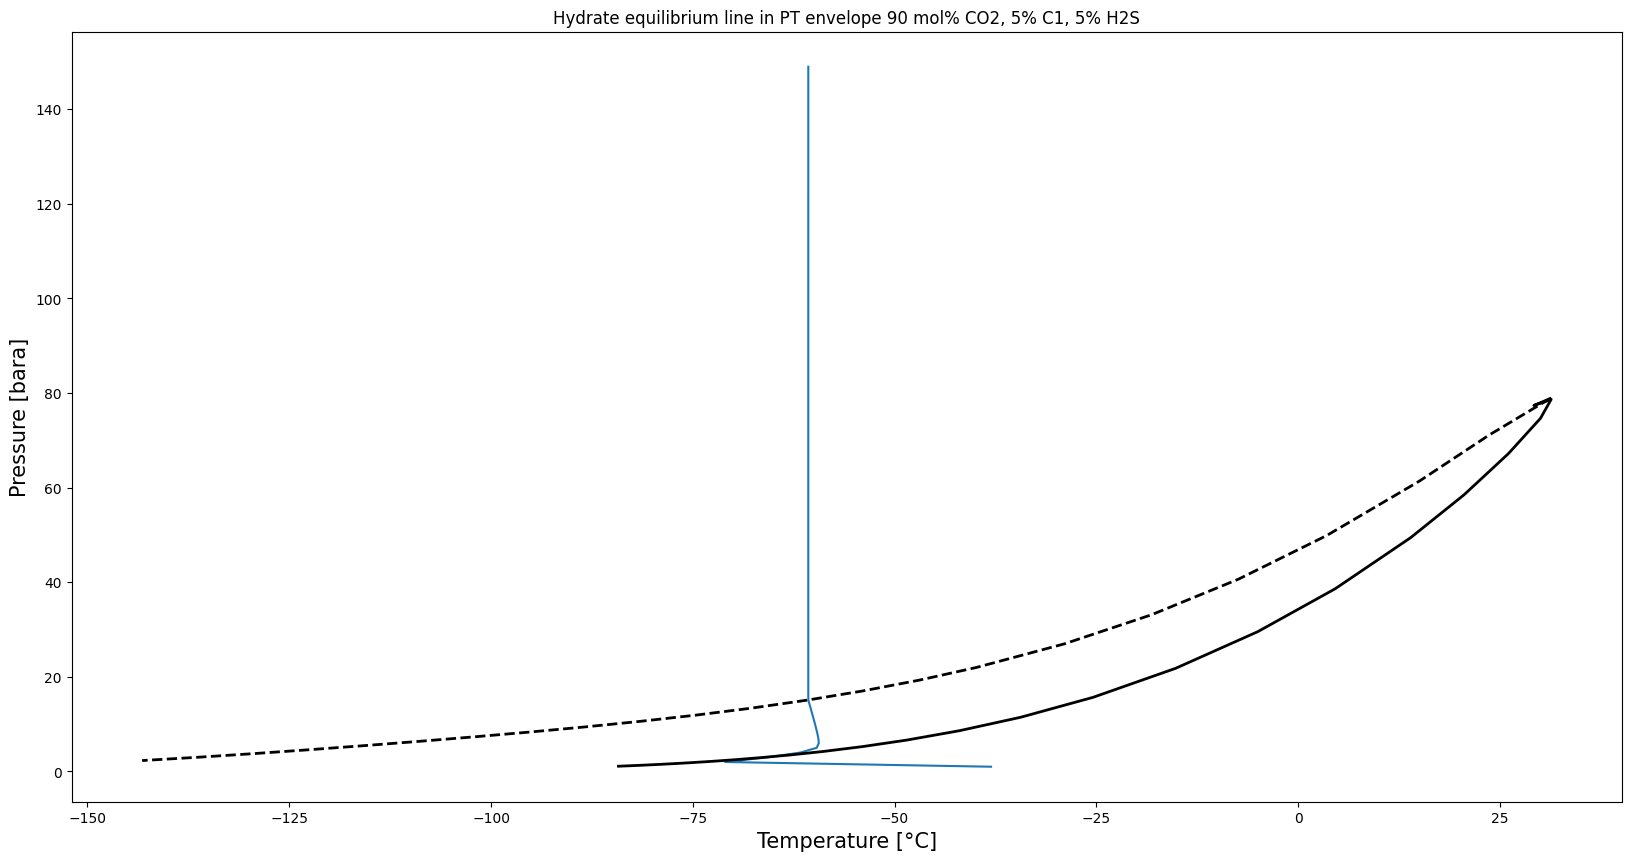

In [ ]:
fluid1 = fluid('umr')
fluid1.addComponent('H2S',5.0)
fluid1.addComponent('methane',5.0)
fluid1.addComponent('CO2',90.0)
fluid1.setMixingRule("HV", "UNIFAC_UMRPRU")
fluid1.setSolidPhaseCheck('CO2')

def freezeT(pressure):
    fluid1.setPressure(pressure, 'bara')
    freeze(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 150.0, 1.0)
temperature = [freezeT(P) for P in pressure]

plt.plot(temperature, pressure);
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point", linewidth=2, color='k')
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point", linestyle='--', linewidth=2, color='k')
plt.title('Hydrate equilibrium line in PT envelope 90 mol% CO2, 5% C1, 5% H2S')
plt.xlabel('Temperature [\u00B0C]', fontsize=15)
plt.ylabel('Pressure [bara]', fontsize=15)
ax.grid('on')


#Calculation of hydrate equilibrium lines in CO2 rich mixtures (600 ppm mole water)
In the following example we will use the CPA-EoS for calculation of hydrate equilibrium temperature in a CO2 rich mixture (90% CO2, 5% methane, 5% H2S) with 600 ppm water.

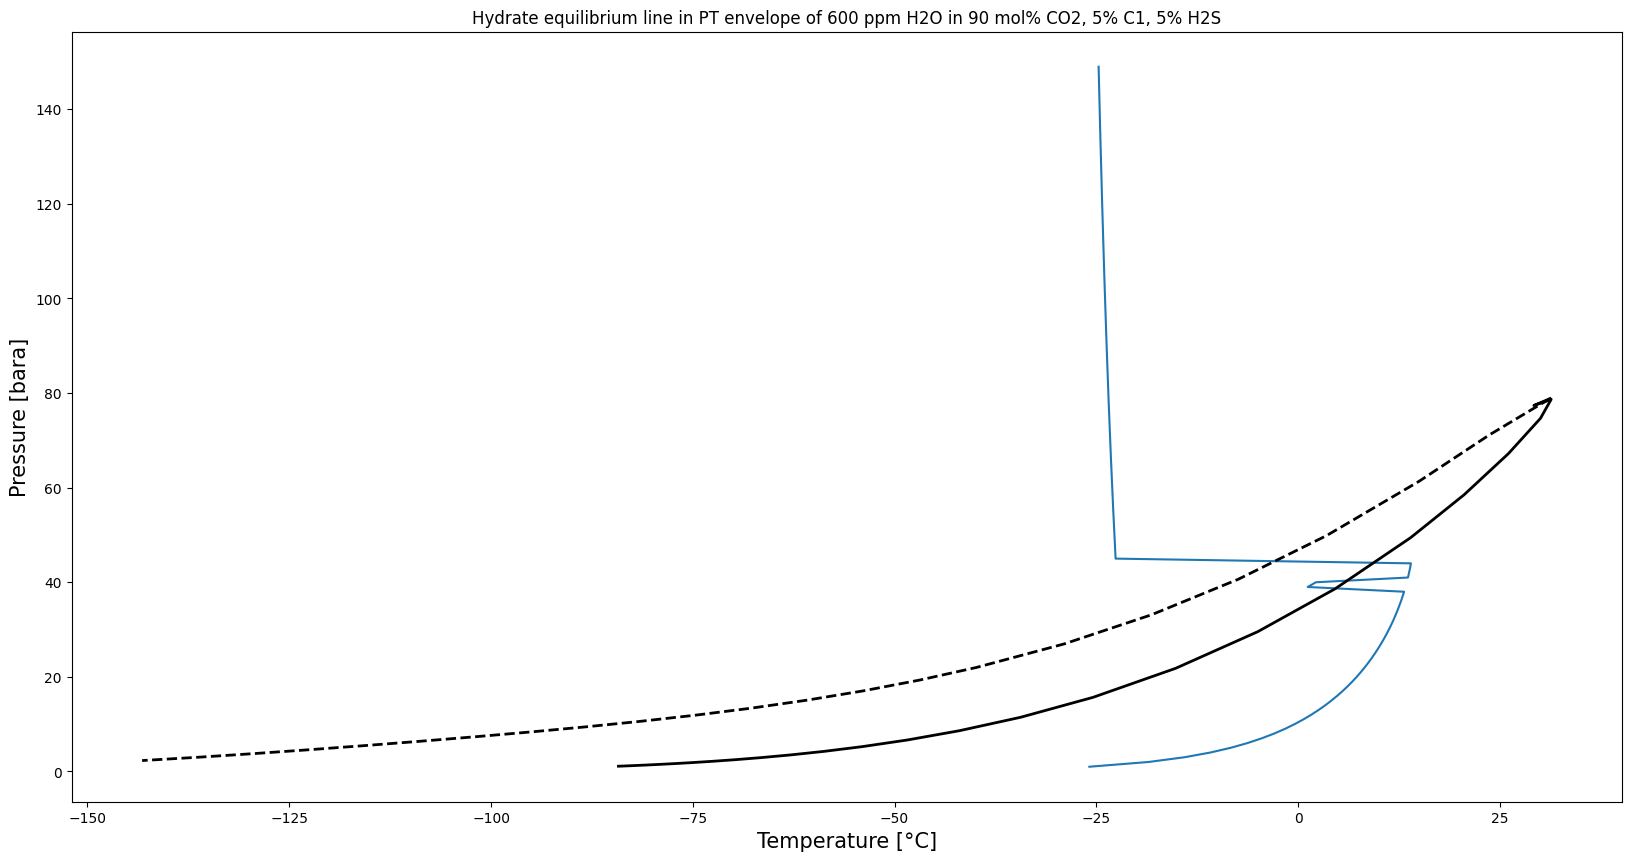

In [ ]:
fluid1 = fluid('cpa')
fluid1.addComponent('water',600e-4)
fluid1.addComponent('H2S',5.0)
fluid1.addComponent('methane',5.0)
fluid1.addComponent('CO2',90.0)
fluid1.setMixingRule(10)

def hydTemp(pressure):
    fluid1.setPressure(pressure, 'bara')
    hydt(fluid1)
    return fluid1.getTemperature('C')

pressure = np.arange(1.0, 150.0, 1)
temperature = [hydTemp(P) for P in pressure]

plt.plot(temperature, pressure);
plt.xlabel('Temperature [C]');
plt.ylabel('Pressure [bara]');
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("dewT"))],list(thermoOps.getOperation().get("dewP")), label="dew point", linewidth=2, color='k')
plt.plot([x - 273.15 for x in list(thermoOps.getOperation().get("bubT"))],list(thermoOps.getOperation().get("bubP")), label="bubble point", linestyle='--', linewidth=2, color='k')
plt.title('Hydrate equilibrium line in PT envelope of 600 ppm H2O in 90 mol% CO2, 5% C1, 5% H2S')
plt.xlabel('Temperature [\u00B0C]', fontsize=15)
plt.ylabel('Pressure [bara]', fontsize=15)
ax.grid('on')
